In [505]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1193]:
from dtcwt_classifier import DtcwtClassifier
from keras.datasets import cifar10
import numpy

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

cls = DtcwtClassifier(m = 2)
X_train1 = []
y_train1 = []
for i in range(200):
    X_train1.append(rgb2gray(X_train[i]))
    y_train1.append(y_train[i][0])
cls.fit(X_train1, y_train1)

In [1194]:
X_test1 = []
y_test1 = []
for i in range(100):
    X_test1.append(rgb2gray(X_test[i]))
    y_test1.append(y_test[i][0])
accuracy = cls.evaluate(X_test1, y_test1)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 29.00


# Visualization

In [2]:
def resize(x):
    current_size = len(x)
    new_size = 2 ** (int(np.log2(current_size)) + 1)
    return np.pad(
        x,
        pad_width=int((new_size - current_size) / 2),
        mode="constant",
        constant_values=0,
    )

In [587]:
import random
import numpy as np

def choose_random_feature(layers, layer):
    idx = np.where(layers==layer)[0]
    return random.sample(idx.tolist(), 1)[0]

def estimate_activation(im, feature_im):
    activation = 0
    for i in range(feature_im.shape[0]):
        for j in range(feature_im.shape[1]):
            activation += abs(feature_im[i, j])
    return activation

def find_max_activations(images, layer, n_images=1, feature=None):
    transform = dtcwt_scattering_2d.DtcwtScattering2D()
    activations = dict()
    
    if feature != None:
        print("Chosen feature for layer "+ str(layer) + ": "+ str(feature))

    for i in range(len(images)):
        X = images[i]
        scat = transform.transform(np.asarray(X), m=2, enableReconstruction=True)
        if feature == None:
            feature = choose_random_feature(transform.get_scat_layers(), layer)
            print("Chosen feature for layer "+ str(layer) + ": "+ str(feature))
        
        feature_im = transform.inverse(feature)
        activation = estimate_activation(images[i], feature_im)
        if len(activations) < n_images:
            activations[activation] = [feature_im, images[i]]
        else:
            max_key = max(activations.keys())
            if max_key < activation:
                del activations[max_key]
                activations[activation] = [feature_im, images[i]]
    return list(activations.values())

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def show_images(images):
    w=10
    h=10
    fig = pyplot.figure(figsize=(7, 7))
    columns = 1
    rows = 1
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        pyplot.imshow(abs(images[i-1]))
    pyplot.show()

In [633]:
from dtcwt_scattering import dtcwt_scattering_2d
from keras.datasets import cifar10
from matplotlib import pyplot
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
images = []
for i in range(0, 9):
    images.append(rgb2gray(X_train[i]))

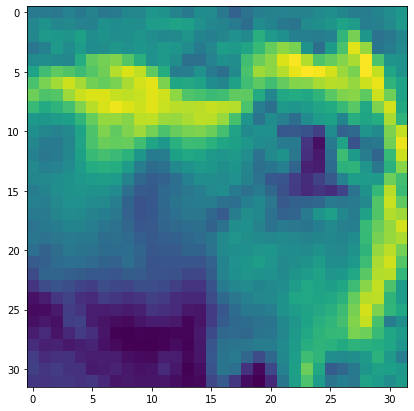

In [601]:
show_images(images)

In [602]:
def find_features_and_show(images, layer, feature = None):
    n_images = 9
    results = find_max_activations(images, layer=layer, n_images=n_images, feature=feature)
    fig = pyplot.figure(figsize=(15, 15))
    columns = 9
    rows = 1
    for i in range(1, columns*rows + 1):
        fig.add_subplot(rows, columns,i)
        pyplot.imshow(results[i-1][0])
    fig1 = pyplot.figure(figsize=(15, 15))
    for i in range(1, columns*rows + 1):
        fig1.add_subplot(rows, columns,i)
        pyplot.imshow(results[i-1][1])
    pyplot.show()

# CIFAR-10

## Layer 0

Chosen feature for layer 0: 0


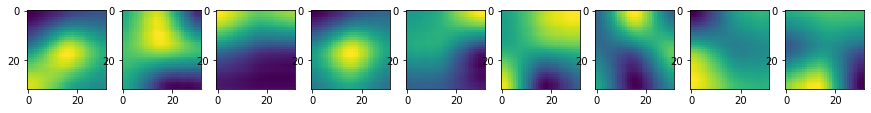

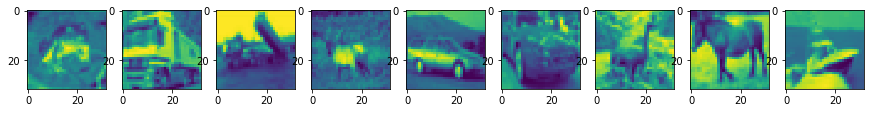

In [634]:
find_features_and_show(images, 0)

# Layer 1

Chosen feature for layer 1: 121


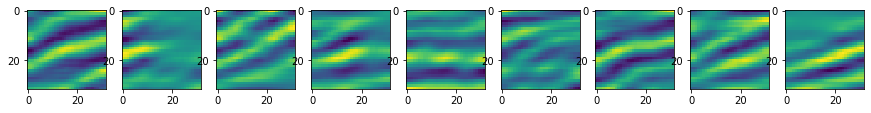

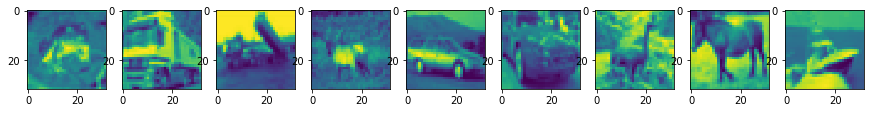

In [635]:
find_features_and_show(images, 1)

Chosen feature for layer 1: 121


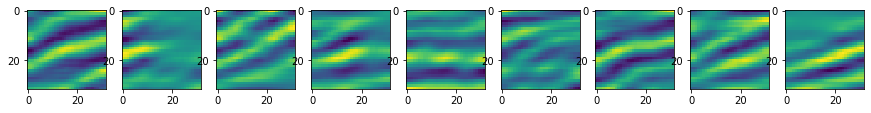

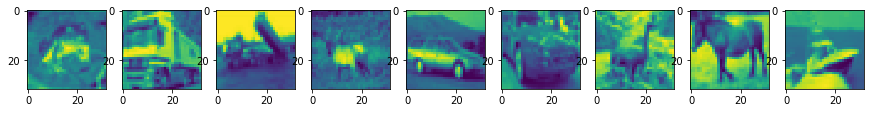

In [636]:
find_features_and_show(images, 1)

Chosen feature for layer 1: 100


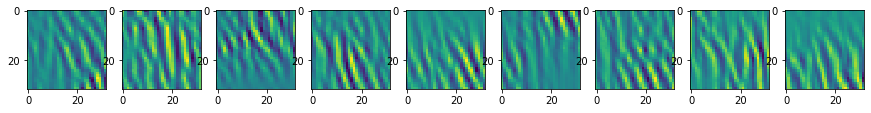

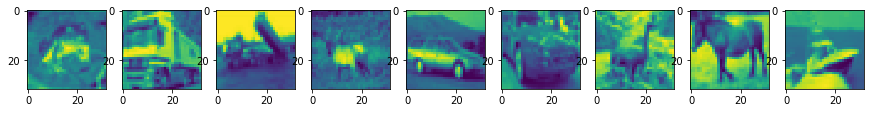

In [637]:
find_features_and_show(images, 1)

## Layer 2

Chosen feature for layer 2: 34


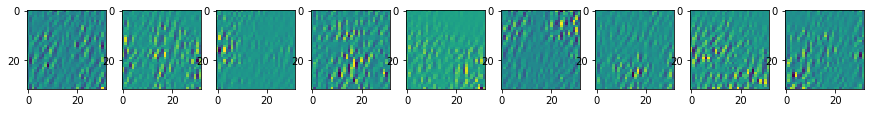

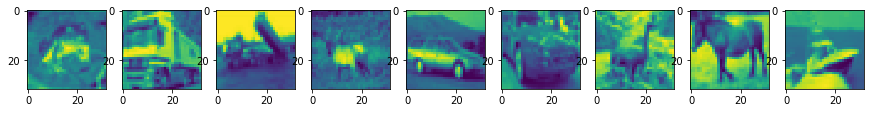

In [638]:
find_features_and_show(images, 2)

Chosen feature for layer 2: 113


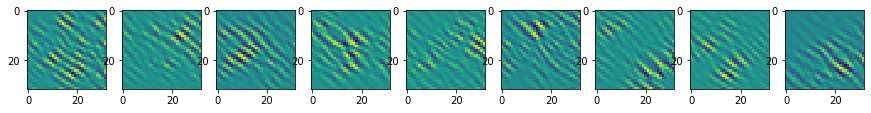

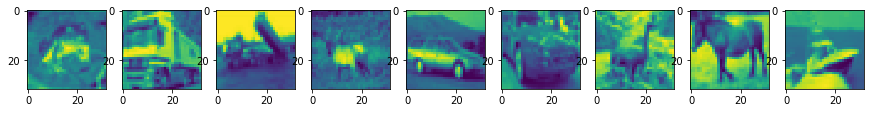

In [639]:
find_features_and_show(images, 2)

Chosen feature for layer 2: 22


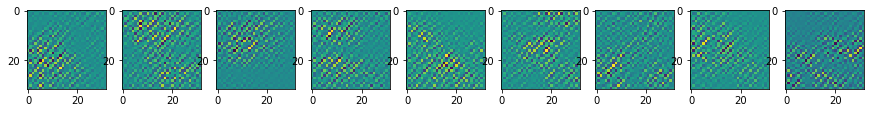

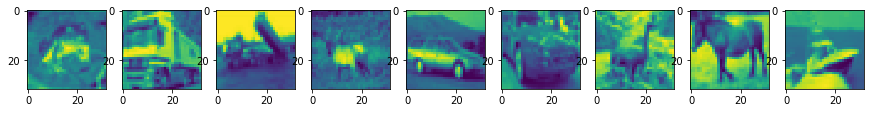

In [640]:
find_features_and_show(images, 2)

# Textures

In [655]:
from os import listdir
from os.path import isfile, join
import matplotlib.image as mpimg
files = listdir('./images/')
images = []
for f in files:
    img=mpimg.imread('./images/'+f)
    images.append(rgb2gray(img)[:128, :128])
images = images[0:9]

Chosen feature for layer 0: 0


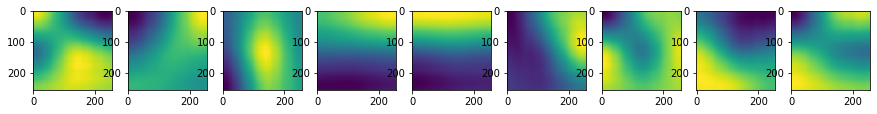

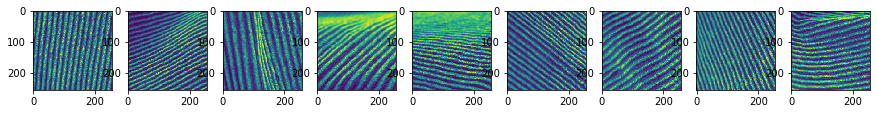

In [647]:
find_features_and_show(images, 0)

Chosen feature for layer 1: 432


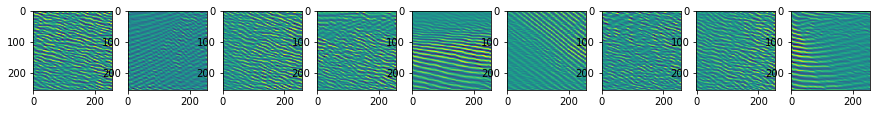

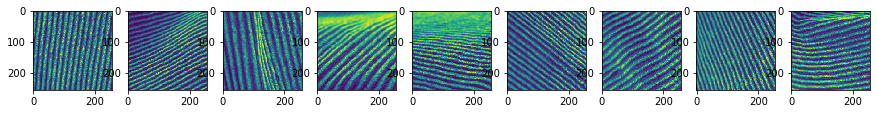

In [654]:
find_features_and_show(images, 1)

Chosen feature for layer 1: 477


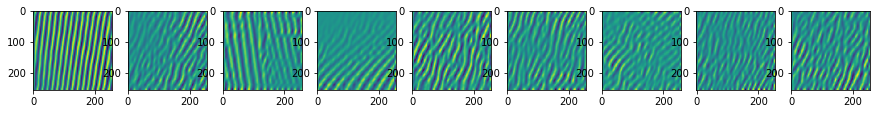

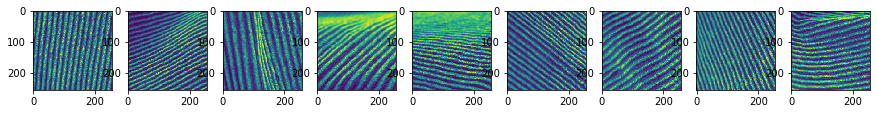

In [646]:
find_features_and_show(images, 1, feature=477)

Chosen feature for layer 1: 378


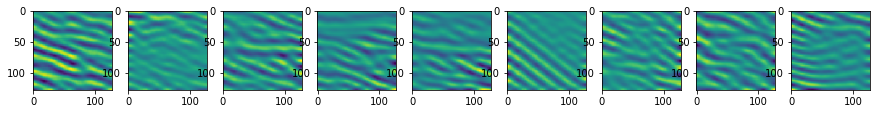

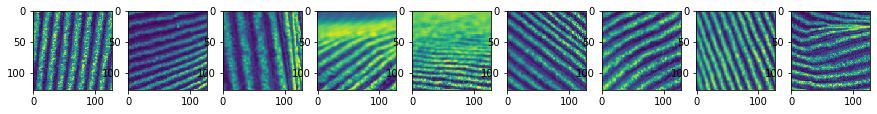

In [630]:
find_features_and_show(images, 1)

Chosen feature for layer 2: 211


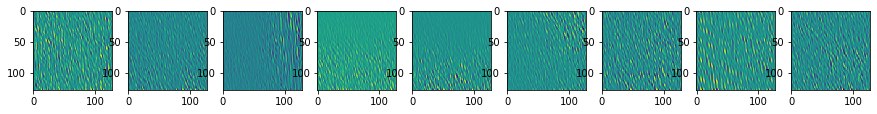

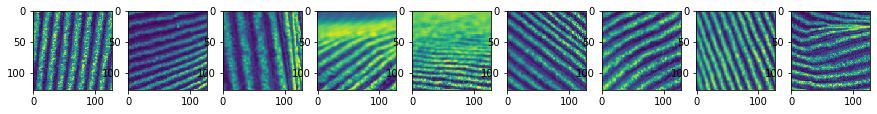

In [626]:
find_features_and_show(images, 2)

Chosen feature for layer 2: 292


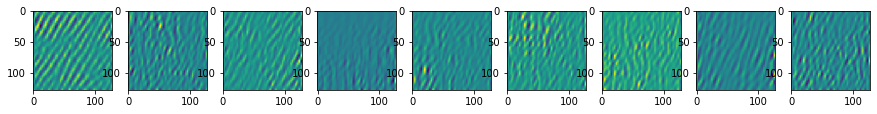

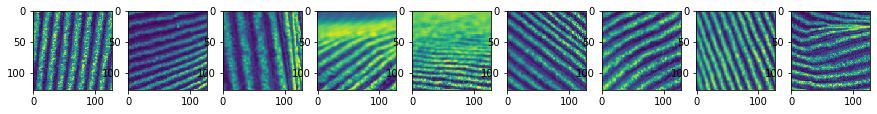

In [627]:
find_features_and_show(images, 2)

In [ ]:
    def __restore_phase(self, magnitude, phases):
        # print(magnitude.shape)
        highpass = np.zeros((magnitude.shape[0], magnitude.shape[1]), dtype=complex)
        h = magnitude.shape[0]
        n_cells = int(h)
        k = 0
        for i in range(n_cells):
            for j in range(n_cells):
                self.__set_region_phase(i, j, phases[k], magnitude, highpass)
                k += 1

        return highpass
    
        def __store_phase(self, highpass):
        h = highpass.shape[0]
        n_cells = int(h)
        phase = []

        for i in range(n_cells):
            for j in range(n_cells):
                _, f = self.__get_region_magnitude_and_phase(
                    highpass[i : i + 1, j : j + 1]
                )
                phase.append(f)
        self.phases.append(phase)